# 二項分布

正規分布以外に従う線形モデルを一般線形モデルと呼ぶ。

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import statsmodels.formula.api as smf
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
stats.binom.pmf(
    k=1,    # 成功回数
    n=2,    # 試行回数
    p=0.5,  # 成功確率
)

0.5

In [3]:
# 「成功確率が 20% の試行を 10 回行い、成功回数を数える」というシミュレーションを 5 回行う
np.random.seed(1)
stats.binom.rvs(
    n=10,
    p=0.2,
    size=5
)

array([2, 3, 0, 1, 1])

[  1.07374182e-01   2.68435456e-01   3.01989888e-01   2.01326592e-01
   8.80803840e-02   2.64241152e-02   5.50502400e-03   7.86432000e-04
   7.37280000e-05   4.09600000e-06]


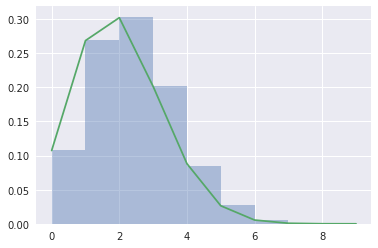

In [18]:
# N=10, p=0.2 の二項分布
binomial = stats.binom(n=10, p=0.2)

# 10000 回サンプリング
np.random.seed(1)
rvs_binom = binomial.rvs(size=10000)

# 確率質量関数
m = np.arange(0, 10, 1)
pmf_binom = binomial.pmf(k=m)

# ヒストグラムと確率質量関数を併せて図示
sns.distplot(rvs_binom, bins=m, kde=False, norm_hist=True)
plt.plot(m, pmf_binom)

----

# ポワソン分布

In [5]:
# 強度が 5 のポワソン分布において、 2 が得られる確率
stats.poisson.pmf(k=2, mu=5)

0.084224337488568321

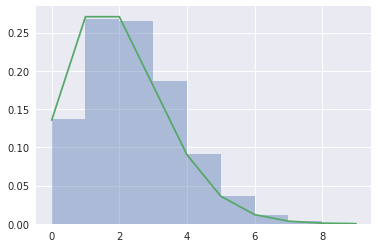

In [11]:
# 強度が 2 のポワソン分布
np.random.seed(1)
poisson = stats.poisson(mu=2)

# 10000 回サンプリング
rvs_poisson = poisson.rvs(size=10000)

# 確率質量関数
pmf_poisson = poisson.pmf(k=m)

# ヒストグラムと確率質量関数を併せて図示
sns.distplot(rvs_poisson, bins=m, kde=False, norm_hist=True)
plt.plot(m, pmf_poisson)

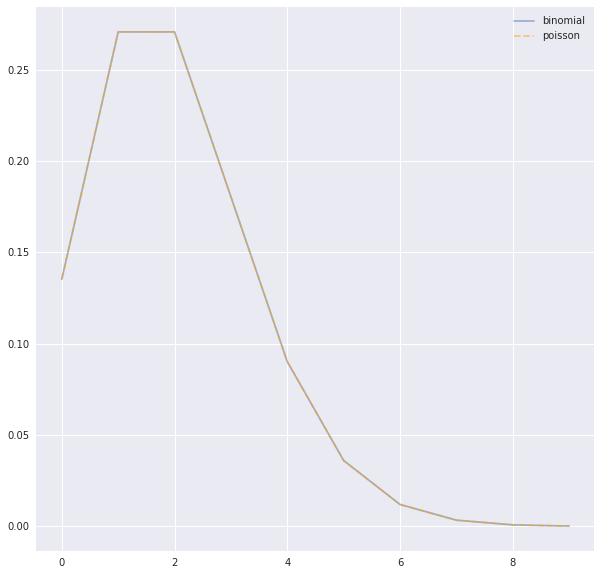

In [40]:
# N が大きく、p が小さいときの二項分布はポワソン分布に近づくことを確認

binom = stats.binom(n=100000, p=0.00002)
pmf_binomial = binom.pmf(k=m)

plt.figure(figsize=(10, 10))
plt.plot(m, pmf_binomial, label='binomial', alpha=0.5)
plt.plot(m, pmf_poisson, label='poisson', alpha=0.5, linestyle='--', color='orange')
plt.legend(loc='best')